# 2.2 Time Series
Task: Load the data (energydata complete.csv) and perform the following analysis. 
1. Plot the appliances energy consumption for whole period and a closer look at any one week of consumption. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

data_path ='/content/drive/MyDrive/ME592X assignments/Assignment 1/energydata_complete.csv' 
data=pd.read_csv(data_path)
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy Consumption
0,1/11/2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433
1,1/11/2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195
2,1/11/2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668
3,1/11/2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390
4,1/11/2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,5/27/2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812
19731,5/27/2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940
19732,5/27/2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117
19733,5/27/2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784


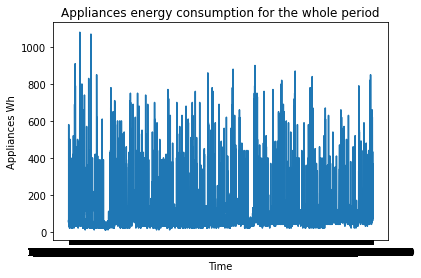

In [ ]:
data_np = data.to_numpy()
date = data_np[:,0]
Appli = data_np[:,1]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(date,Appli)
ax.set_title('Appliances energy consumption for the whole period')
ax.set_xlabel('Time')
ax.set_ylabel('Appliances Wh')
plt.show()

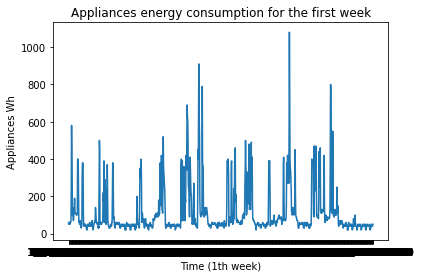

In [ ]:
week = date[1:1008]
Appli_week = Appli[1:1008]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(week,Appli_week)
ax.set_title('Appliances energy consumption for the first week')
ax.set_xlabel('Time (1th week)')
ax.set_ylabel('Appliances Wh')
plt.show()

2. Plot heatmap of hourly consumption of appliances for a week. An example heatmap looks like Figure 1. 

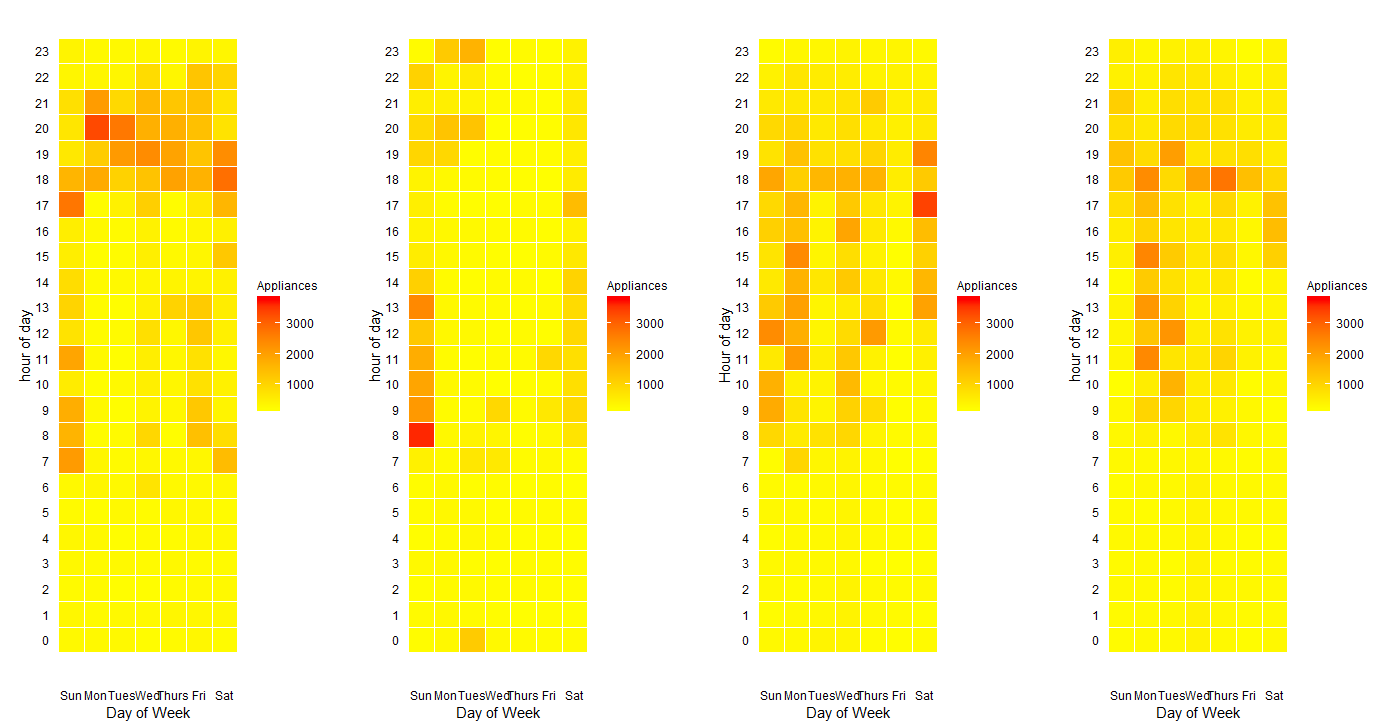

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/ME592X assignments/Assignment 1/Appliances-energy-prediction-data/appliances_scaled.png')
cv2_imshow(img)

The heatmap of appliance energy consumption between 1/17/2016 and 1/23/2016 is shown as following

Text(15.0, 0.5, 'hour of a day')

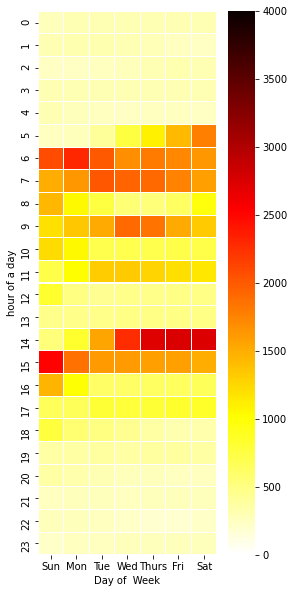

In [ ]:
import seaborn as sns;
import calendar;
plt.figure(figsize=(4,10));

Appli_per_hour = [];
for i in range(7*24):
    Appli_per_hour.append(np.sum(Appli[762+i:762+i+6]));
Appli_per_hour = np.reshape(Appli_per_hour, (24,7));
np.flipud(Appli_per_hour);

ax = sns.heatmap(Appli_per_hour,vmin=0,vmax=4000, cmap='hot_r',linewidths=0.1,cbar=True)
ax.set_xlabel('Day of  Week')
ax.set_xticklabels(['Sun','Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat'])
ax.set_ylabel('hour of a day')

3. Plot the histogram of energy consumption of appliances.

The histogram is shown below. As we can see in this figure, the data distribution has a long tail, and it concentrates (0,200)

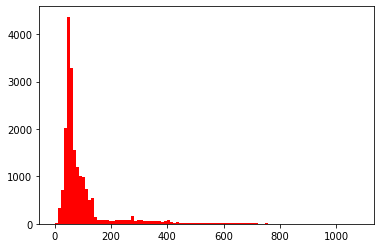

In [ ]:
max = Appli.max();
plt.hist(Appli,bins=100,range=[0,max],color='r')
plt.show()

4. Construct a feature variable NSM (no. of seconds from midnight) and plot energy consumption vs. NSM. 

In [ ]:
from datetime import datetime
import time

In [ ]:
seconds = [];
for i in range(42):
  date_object_0 = datetime.strptime(date[0], "%m/%d/%Y %H:%M")
  date_object = datetime.strptime(date[i], "%m/%d/%Y %H:%M")
  seconds.append((date_object-date_object_0).total_seconds())

In [ ]:
days = int(len(date[42:])/(24*6))

In [ ]:
for i in range(days):
  for j in range(24*6):
    date_object_0 = datetime.strptime(date[42+24*6*i], "%m/%d/%Y %H:%M")
    date_object = datetime.strptime(date[42+24*6*i+j], "%m/%d/%Y %H:%M")
    seconds.append((date_object-date_object_0).total_seconds())


In [ ]:
n = len(seconds);
for i in range(len(date)-n):
  date_object_0 = datetime.strptime(date[n], "%m/%d/%Y %H:%M");
  date_object = datetime.strptime(date[i+n], "%m/%d/%Y %H:%M");
  seconds.append((date_object-date_object_0).total_seconds());
len(seconds)

19735

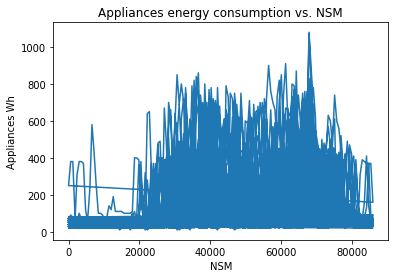

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(seconds,Appli)
ax.set_title('Appliances energy consumption vs. NSM')
ax.set_xlabel('NSM')
ax.set_ylabel('Appliances Wh')
plt.show()

5. Plot appliances energy consumption vs. Press mm Hg.

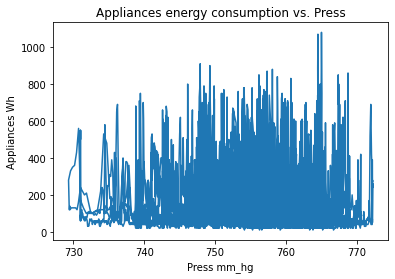

In [ ]:
Press = data_np[:,22]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(Press,Appli)
ax.set_title('Appliances energy consumption vs. Press')
ax.set_xlabel('Press mm_hg')
ax.set_ylabel('Appliances Wh')
plt.show()

6. It is observed that the major contributing factors for the energy consumption among all other features is NSM and Press mm Hg. Comment on it. 

RandomForestRegression method was used to decide the importance of the features. However, the results are not perfect because NSM is the most important feature but Press is just the 4th important feature. Details are shown below. What's more the importance ranking of these features don't change much when parameters of Random Forest method change. 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
train_data_path = '/content/drive/MyDrive/ME592X assignments/Assignment 1/Appliances-energy-prediction-data/training.csv'
train_data = pd.read_csv(train_data_path)
train_data_np = train_data.to_numpy()
y = train_data['Appliances'];
X = train_data_np[:,3:30];

In [ ]:
rfr = RandomForestRegressor(max_depth=20,min_samples_split=8, n_estimators=100)
rfr.fit(X, y)

test_data_path = '/content/drive/MyDrive/ME592X assignments/Assignment 1/Appliances-energy-prediction-data/testing.csv'
test_data = pd.read_csv(test_data_path)
test_data_np = test_data.to_numpy()
test_y = test_data['Appliances'];
test_x = test_data_np[:,3:30];
print(rfr.score(test_x, test_y))


0.5284646725832605


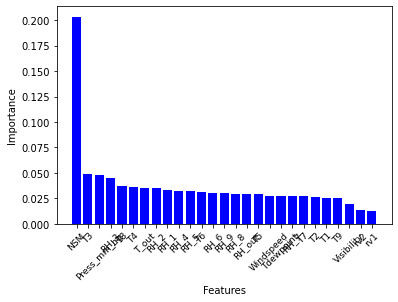

In [ ]:
feature_important = pd.Series(rfr.feature_importances_, index = test_data.columns.tolist()[3:30]).sort_values(ascending=False)
plt.bar(feature_important.index, feature_important.values, align = 'center',color = 'b')
plt.xticks(size='small',rotation=45,fontsize=9);
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()